<a href="https://colab.research.google.com/github/kjedrzejczak/Wprowadzenie_do_sieci_neuronowych-Tensorflow_2.0-Keras/blob/main/ANN_klasyfikacja_mnist_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = "{:.6f}".format
sns.set()

In [10]:
(X_train, y_train), (X_test, y_test) = load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [13]:
print(X_train.shape)
print(y_train.shape)
print()
print(y_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)

(10000,)
(10000,)


In [14]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

In [15]:
print(y_train[0])

9


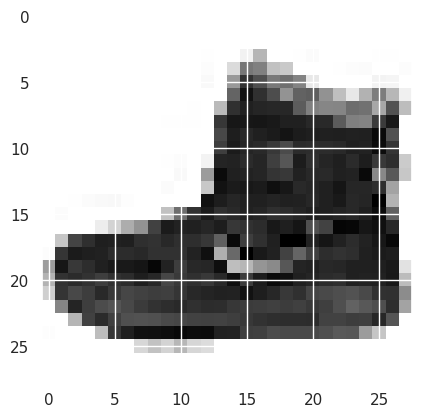

In [24]:
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

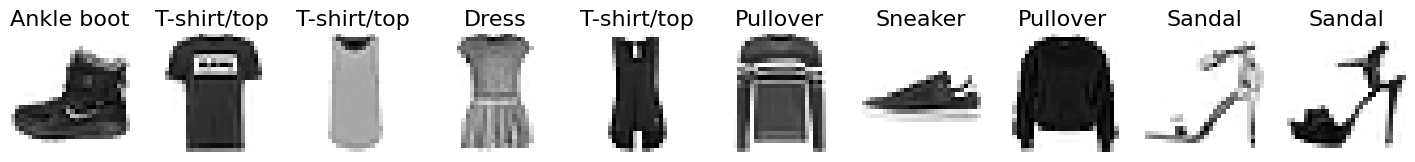

In [31]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(18, 13))
for i in range(1, 11):
  plt.subplot(1, 10, i)
  plt.axis('off')
  plt.imshow(X_train[i - 1], cmap='gray_r')
  plt.title(class_names[y_train[i - 1]], color='black', fontsize=16)
plt.show()


In [32]:
X_train = X_train / 255.
X_test = X_test / 255.


# Model

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


epochs - ile razy zestaw treningowy zostanie przetworzony przez model. Przy każdej iteracji optymalizator próbuje dopasować wagi, aby funkcja celu została zminimalizowana.

batch_size - liczba przykładów treningowych po której następuje aktualizacji wag

validation_split - procent danych użytych do walidacji

In [36]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=10)

Epoch 1/10
4800/4800 [==============================] - 20s 4ms/step - loss: 0.4991 - accuracy: 0.8222 - val_loss: 0.4312 - val_accuracy: 0.8404
Epoch 2/10
4800/4800 [==============================] - 18s 4ms/step - loss: 0.3781 - accuracy: 0.8616 - val_loss: 0.3900 - val_accuracy: 0.8616
Epoch 3/10
4800/4800 [==============================] - 21s 4ms/step - loss: 0.3380 - accuracy: 0.8746 - val_loss: 0.4066 - val_accuracy: 0.8596
Epoch 4/10
4800/4800 [==============================] - 31s 7ms/step - loss: 0.3123 - accuracy: 0.8846 - val_loss: 0.3428 - val_accuracy: 0.8763
Epoch 5/10
4800/4800 [==============================] - 28s 6ms/step - loss: 0.2959 - accuracy: 0.8907 - val_loss: 0.3351 - val_accuracy: 0.8813
Epoch 6/10
4800/4800 [==============================] - 18s 4ms/step - loss: 0.2819 - accuracy: 0.8942 - val_loss: 0.3383 - val_accuracy: 0.8823
Epoch 7/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.2682 - accuracy: 0.9014 - val_loss: 0.3571 - val_ac

In [37]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.499143,0.822229,0.431235,0.840417,0
1,0.378103,0.861562,0.390016,0.861583,1
2,0.338041,0.874583,0.406573,0.859583,2
3,0.312286,0.884604,0.342780,0.876250,3
4,0.295899,0.890729,0.335057,0.881333,4
5,0.281944,0.894250,0.338301,0.882250,5
6,0.268229,0.901417,0.357135,0.874583,6
7,0.258318,0.904979,0.345665,0.882750,7
8,0.250430,0.905937,0.343551,0.881667,8
9,0.242030,0.909708,0.340863,0.887583,9


Ocena modelu

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)  # most important 👈👈👈👈
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and loss.')
fig.show()

Ewaluacja modelu na danych których model jeszcze nie widział

In [46]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)  # sprawdzamy czy model zbyt dobrze sie nie dopasował lub czy jest za słaby
print(test_acc)

0.8798999786376953


Predykcja na modelu

model.evaluate(y_true, y_pred) - pozwala obliczyć metryki modelu

model.predict_classes() - pozwala zwrócić odpowiednio przewidziane klasy#error👈

model.predict_proba(), model.predict() - pozwala zwrócić prawdopodobieństwo danej klasy

In [47]:
predictions = model.predict(X_test)
predictions

313/313 [==============================] - 1s 2ms/step


array([[0.000000112513, 0.000000000069, 0.000000000002, ..., 0.02281949    , 0.00000000418 , 0.97692823    ],
       [0.000037370348, 0.000000000035, 0.9995695     , ..., 0.            , 0.            , 0.            ],
       [0.000000000004, 0.99999994    , 0.            , ..., 0.            , 0.            , 0.            ],
       ...,
       [0.000000025065, 0.            , 0.000000006308, ..., 0.000000000037, 0.99999946    , 0.            ],
       [0.000000000667, 0.9999929     , 0.            , ..., 0.000000000003, 0.00000012421 , 0.            ],
       [0.000000098818, 0.000000000003, 0.000000036244, ..., 0.0003930675  , 0.000020065558, 0.000000041286]], dtype=float32)

In [48]:
predictions_df = pd.DataFrame(predictions)
predictions_df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000252,0.000000,0.022819,0.000000,0.976928
1,0.000037,0.000000,0.999569,0.000000,0.000332,0.000000,0.000061,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.999984,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.114241,0.000000,0.006431,0.000079,0.001476,0.000014,0.877753,0.000005,0.000000,0.000001
...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000005,0.000000,0.999995
9996,0.000000,0.999961,0.000000,0.000038,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
9997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.999999,0.000000
9998,0.000000,0.999993,0.000000,0.000007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
#predict_cls = model.predict_classes(X_test)
#predict_cls

In [71]:
predict_cls = np.argmax(predictions, axis=1) # 👈👈👈👈👈👈
predictions_cls = predict_cls.tolist()


Sprawdzanie predykcji

In [74]:

#@title Wybierz indeks zdjęcia:
idx = 2284 #@param {type: 'slider', min:0, max:10000}

if predictions_cls[idx] == y_test[idx]:
    color = 'green'
else:
    color = 'red'

fig = go.Figure()
fig.add_trace(go.Bar(x=class_names, y=predictions_df.iloc[idx], orientation='v',
                     marker_color=color))
fig.update_layout(width=800, title=f'Predykcja: {class_names[predictions_cls[idx]]}')
fig.show()

from PIL import Image, ImageOps
import numpy as np

data = (X_test[idx] * 255).astype(np.uint8)
img = Image.fromarray(data, 'L')
img = ImageOps.invert(img.convert('RGB'))
img.save('sample.png')

from IPython import display
display.Image('sample.png', width=200)